 # Análise e Agrupamento de Clientes com K-Means


## Importando Bibliotecas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

## Análise dos Dados

Carregando a base de dados

In [2]:
df = pd.read_csv(r'Mall_Customers.csv')

Verificando os dados

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

Estatística Descritiva

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Tipos de Dados

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Verificando registros nulos

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Visualização de Dados

In [8]:
plt.style.use('fivethirtyeight')

Verificando as distribuição dos dados

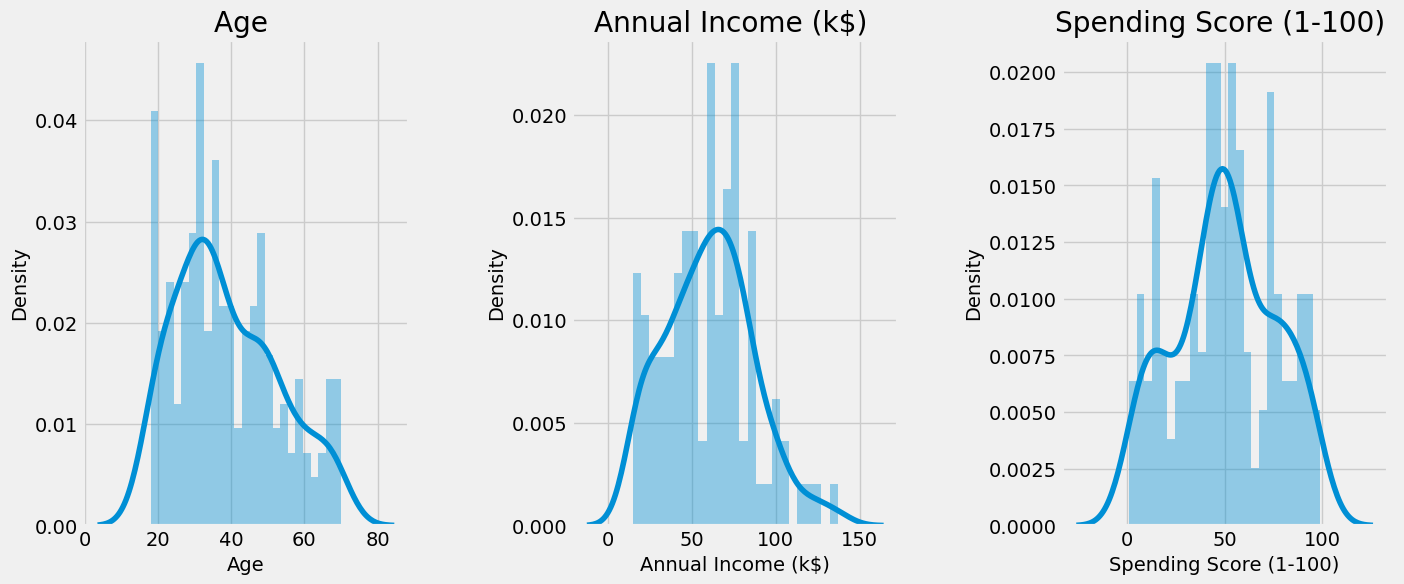

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()

Contagem de Amostras por Sexo

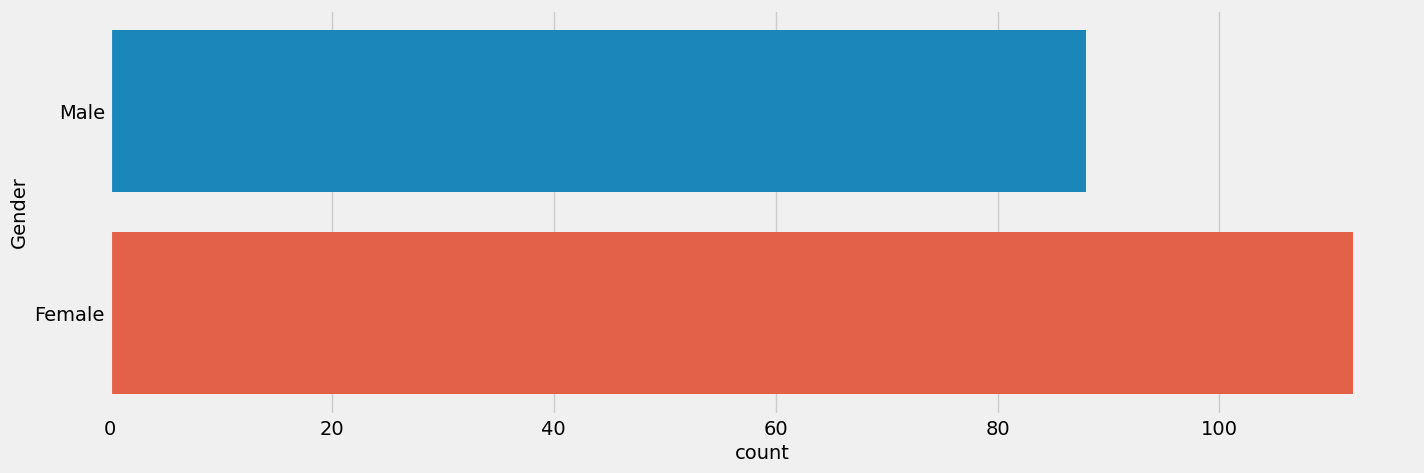

In [8]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

Idade vs Renda Anual

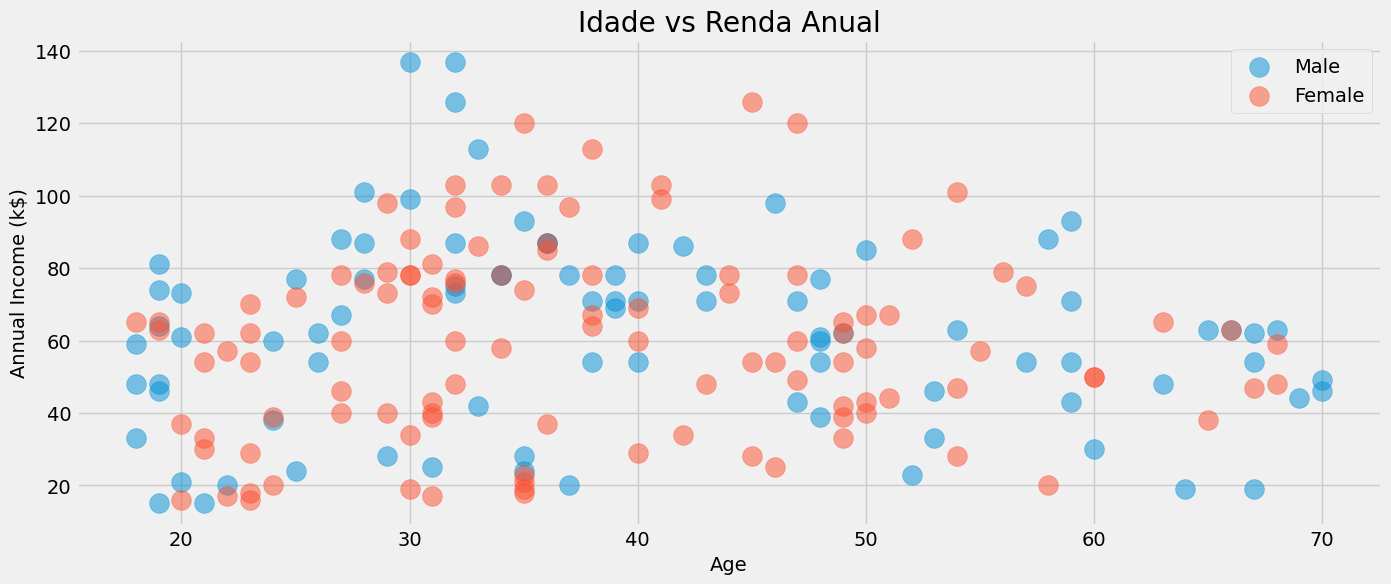

In [9]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Idade vs Renda Anual')
plt.legend()
plt.show()

Renda Anual vs Pontuação de Gastos

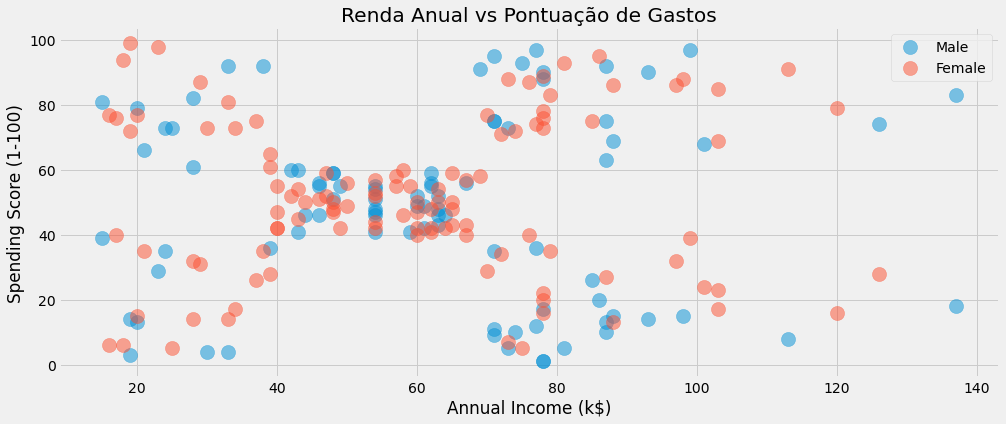

In [17]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Renda Anual vs Pontuação de Gastos')
plt.legend()
plt.show()

Distribuição de Idade, Renda Anual e Pontuação de Gastos segmentado por Sexo

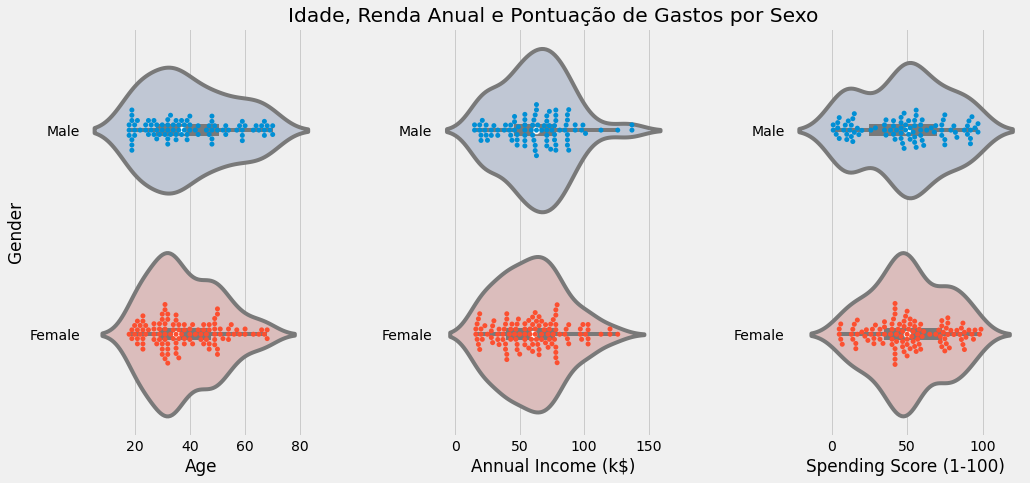

In [18]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Idade, Renda Anual e Pontuação de Gastos por Sexo' if n == 2 else '')
plt.show()

## Agrupamento de dados utilizando o K-Means

**Algoritmo KMeans**

*   **n_clusters**: número de clusters que queremos gerar com os nossos dados
*   **init**: se refere ao modo como o algoritmo será inicializado.
> *k-means++*: É o método padrão, e os centróides serão gerados utilizando um método inteligente que favorece a convergência.
>>
> *random*: Se refere ao modo de inicialização de forma aleatória, ou seja, os centróides iniciais serão gerados de forma totalmente aleatória sem um critério para seleção.
>>
> *ndarray*: array de valores indicando qual seriam os centróides que o algoritmo deveria utilizar  para a inicialização

* **max_iter**: Quantidade máxima de vezes que o algoritmo irá executar, por padrão o valor é 300 iterações.
* **n_jobs**: Quantos CPU´s iremos utilizar para executar o K-means.
* **algorithm**: Versão do algoritmo K-Means a ser utilizada. A versão clássica é executada através do valor full.

**Atributos Importantes** 
> **inertia**: Soma das distâncias quadráticas intra cluster.
>>
> **labels_**: Rótulos dos Clusters atribuídos.
>>
> **cluster_centers_**: Valores dos Centroides.

Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters).

In [19]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

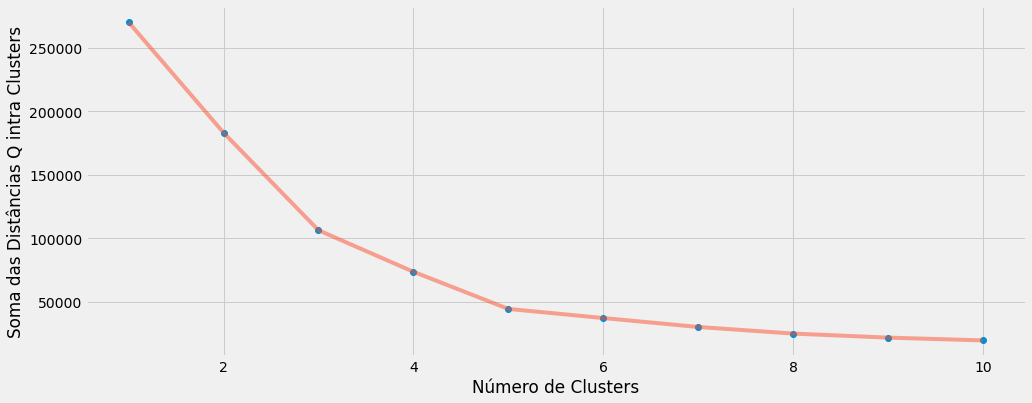

In [20]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

Inicializando e Computando o KMeans com o valor de 4 clusters

In [ ]:
algorithm = (KMeans(n_clusters = 4))
algorithm.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Visualizando os grupos criados e seus centroides

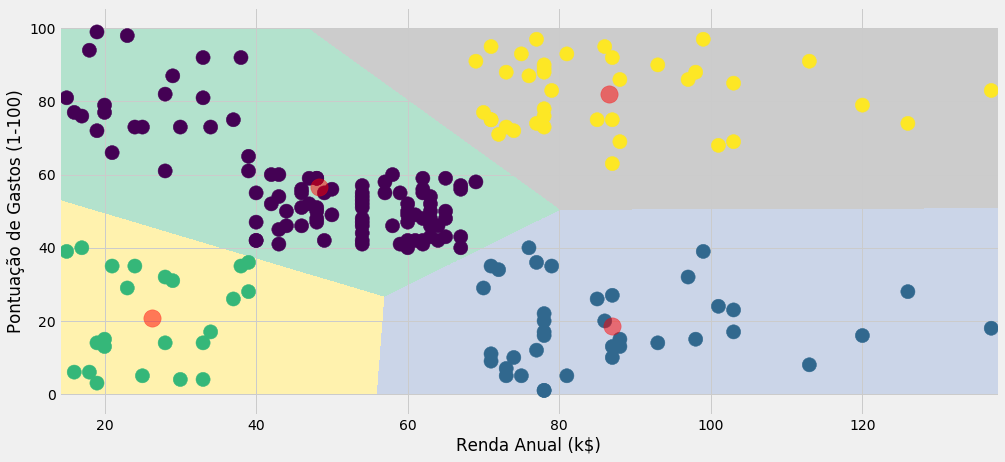

In [ ]:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Pontuação de Gastos (1-100)') , plt.xlabel('Renda Anual (k$)')
plt.show()

### Analisando os dados agrupados

In [ ]:
df["clusters"] = algorithm.labels_

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


In [ ]:
df_group = df.drop(["CustomerID","Age"],axis=1).groupby("clusters")

In [ ]:
df_group.describe()

Annual Income (k$)                        ... Spending Score (1-100)             
                      count       mean        std  ...                    50%    75%   max
clusters                                           ...                                    
0                     100.0  48.260000  14.562731  ...                   52.5  60.00  99.0
1                      38.0  87.000000  16.271348  ...                   16.5  26.75  40.0
2                      23.0  26.304348   7.893811  ...                   17.0  33.50  40.0
3                      39.0  86.538462  16.312485  ...                   83.0  90.00  97.0

[4 rows x 16 columns]

## References

 - [Blog do Zouza](https://medium.com/blog-do-zouza/o-que-%C3%A9-machine-learning-5e7e98453985)
 - [Minerando Dados](https://www.minerandodados.com.br)